# dataset

In [1]:
# Standard library imports
from datetime import datetime, timedelta

# Third-party library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import yfinance as yf

# Scikit-learn imports
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from scripts.get_top_stocks import *
top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

# specify variables for dataset generation
start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5


Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [3]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [4]:
df.to_csv("temp.csv",index=False)

In [5]:
df = pd.read_csv("temp.csv")
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift,stock_name
0,2023-02-24 13:30:00-05:00,92.754997,93.160004,92.610001,92.964996,92.964996,3931588,0.002261,-0.042071,0.036804,...,-0.037440,-0.037755,-0.045713,5.873573,0.425190,1.095376,-0.449997,-1.09,-0.001518,AMZN
1,2023-02-24 14:30:00-05:00,92.970001,93.235001,92.669899,92.823997,92.823997,4999767,-0.001518,0.063494,0.119599,...,-0.038609,-0.039518,-0.047428,5.833194,0.425205,1.091939,-0.434898,-1.09,0.007149,AMZN
2,2023-02-24 15:30:00-05:00,92.824997,93.650002,92.529999,93.489998,93.489998,8320491,0.007149,0.169580,0.249299,...,-0.031472,-0.032982,-0.040715,5.785932,0.425134,1.107570,0.120003,-1.09,0.009179,AMZN
3,2023-02-27 09:30:00-05:00,94.279999,94.779999,93.620003,94.352097,94.352097,10798576,0.009179,0.128329,0.129613,...,-0.022369,-0.024436,-0.031941,5.740615,0.425477,1.111070,0.159996,0.31,-0.007149,AMZN
4,2023-02-27 10:30:00-05:00,94.355003,94.371002,93.230003,93.680000,93.680000,7009890,-0.007149,-0.108542,-0.212746,...,-0.029112,-0.031707,-0.038942,5.700143,0.425653,1.096378,0.140999,0.31,-0.000320,AMZN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90062,2024-07-31 10:30:00-04:00,230.550003,232.100006,230.399994,231.746994,231.746994,8044026,0.005395,-0.338908,-0.529695,...,0.050301,0.071139,0.027653,31.556902,0.652546,1.333565,0.700012,0.68,-0.000764,TSLA
90063,2024-07-31 11:30:00-04:00,231.768204,232.169998,230.699997,231.570007,231.570007,5001530,-0.000764,-0.323229,-0.233221,...,0.049094,0.069218,0.026394,31.461180,0.652528,1.327506,0.470001,0.68,-0.002421,TSLA
90064,2024-07-31 12:30:00-04:00,231.580002,232.250000,230.824402,231.009995,231.009995,3882591,-0.002421,-0.231447,-0.125948,...,0.046178,0.065573,0.023487,31.370156,0.652330,1.313303,0.425598,0.68,0.000865,TSLA
90065,2024-07-31 13:30:00-04:00,231.020004,231.440002,229.240005,231.210007,231.210007,5356890,0.000865,0.019350,0.159565,...,0.046700,0.065474,0.023687,31.288230,0.651759,1.299005,1.199997,0.68,-0.000022,TSLA


In [6]:
# functions to add target column to df

def categorize_by_percentile(values,percentile_list,labels):
    # Compute percentiles
    percentiles = np.percentile(values, percentile_list)
    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)
    
    return categories

def add_target_cols(df,percentile_list,labels):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)        
        label_mapping = {labels[i]:i for i in range(len(labels))}
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [7]:
# create target column

# percentile_list = [20,40,60,80]
percentile_list = [33,66]
# labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
labels = ['sell', 'hold', 'buy']

df = add_target_cols(df, percentile_list, labels)

/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipykernel_20023/1988958013.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),percentile_list,labels)
/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipykernel_20023/1988958013.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/6y/f4z3z1bs3c14k7sndjwzy0cw0000gn/T/ipyker

In [8]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0
0
0


In [10]:
features = df.columns[8:-4]

# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)
df1 = df1[(np.abs(stats.zscore(df1[features])) < 4).all(axis=1)]
df1.describe()

,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,EMACloseDiff2,...,SMAVolumeDiff256,EMACloseDiff256,SMACloseDiff256,VWAP256,VolatilityStdDev256,Volatility256,Momentum256,PriceVolatilityHourly,FamaFrenchMktReturns,Log_Return_shift
count,80631.000000,80631.000000,80631.000000,80631.000000,80631.000000,8.063100e+04,80631.000000,80631.000000,80631.000000,80631.000000,...,80631.000000,80631.000000,80631.000000,80631.000000,80631.000000,80631.000000,80631.000000,80631.000000,80631.000000,80631.000000
mean,324.072695,325.319934,322.816716,324.089068,324.089068,1.751269e+06,0.000140,-0.035054,0.002153,0.000069,...,-0.100801,0.028197,0.028329,0.026263,14.061976,0.361564,1.070564,1.503218,0.134768,0.000214
std,464.900186,466.091356,463.696308,464.922578,464.922578,4.119371e+06,0.006903,0.172080,0.263429,0.002461,...,0.588631,0.066268,0.077228,0.072507,16.217325,0.131432,0.148861,3.191838,0.771025,0.009577
min,22.488001,22.783991,22.297001,22.584351,22.584351,5.714000e+03,-0.038982,-0.849450,-0.926240,-0.013689,...,-0.959705,-0.241937,-0.271487,-0.256112,0.513079,0.132707,0.629432,-0.947498,-2.160000,-0.307408
25%,103.742500,104.355000,103.090099,103.772499,103.772499,1.700155e+05,-0.003029,-0.154251,-0.172115,-0.001086,...,-0.490748,-0.013357,-0.019944,-0.019997,4.711455,0.267809,0.976067,-0.250000,-0.330000,-0.003071
50%,180.449997,181.350006,179.509995,180.395004,180.395004,3.778930e+05,0.000154,-0.040194,-0.013196,0.000088,...,-0.266739,0.028181,0.026549,0.025774,8.817643,0.339483,1.058368,0.430000,0.150000,0.000167
75%,333.320007,334.651596,331.802505,333.313950,333.313950,1.265848e+06,0.003299,0.088985,0.159742,0.001233,...,0.103410,0.068000,0.072501,0.070405,15.881157,0.427801,1.147842,1.800018,0.680000,0.003405
max,4008.159912,4020.235107,4003.364990,4004.000000,4004.000000,1.032230e+08,0.039460,0.460769,1.000000,0.013918,...,4.384582,0.304977,0.389128,0.352312,125.069199,0.970741,1.819192,27.694946,2.180000,0.264883


In [11]:
# train test split on index
train_size, val_size, test_size = 0.8, 0.1, 0.1
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

((64504, 78), (8063, 78), (8064, 78))

In [12]:
test_df.Target.value_counts()

Target
0    2727
1    2671
2    2666
Name: count, dtype: int64

In [13]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
        'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
        'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
        'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
        'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
        'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
        'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
        'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
        'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
        'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
        'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
        'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
        'Momentum64', 'EMAVolumeDiff1

In [14]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

66
(64504, 66) (64504,)
(8063, 66) (8063,)
(8064, 66) (8064,)


In [15]:
ddf = pd.DataFrame(y_test, columns=['target'])
ddf.groupby(['target'])['target'].count()

target
0    2727
1    2671
2    2666
Name: target, dtype: int64

In [16]:
ddf = pd.DataFrame(y_train, columns=['target'])
ddf.groupby(['target'])['target'].count()

target
0    21042
1    21532
2    21930
Name: target, dtype: int64

In [17]:
# check number of classes in target is correct

set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [31]:
X_train

array([[ 0.15670221,  0.15986163, -0.51391569, ..., -0.02513828,
        -0.63821262,  0.05999042],
       [-0.71451055, -0.82042424,  0.34981474, ...,  0.75078555,
         2.62859115,  0.05999042],
       [-1.64777029, -1.43170941, -0.81427975, ...,  0.86946661,
        -0.55378406,  0.05999042],
       ...,
       [-0.53085027, -0.15518695, -0.06684506, ..., -0.48076146,
        -0.19985208, -0.36408731],
       [-1.25554303, -1.24517578,  0.16103074, ..., -0.97506894,
         0.53894112, -0.36408731],
       [-1.45948879, -0.73760655, -0.46453591, ..., -0.69267925,
        -0.53543563, -0.36408731]])

In [32]:
# standardise the values and PCA
# from scripts.train_predict import *

# # standardise the values and selectKbest
# scaler = StandardScaler()
# pca = PCA(n_components = 0.95)

# # Fit the scaler on the training data and transform the training data
# X_train = scaler.fit_transform(X_train)
# X_train = pca.fit_transform(X_train)

# # Transform the validation data
# X_val = scaler.transform(X_val)
# X_val = pca.transform(X_val)

# # Transform the test data
# X_test = scaler.transform(X_test)
# X_test = pca.transform(X_test)

# X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

# standardise the values and selectKbest
from scripts.train_predict import *
from sklearn.feature_selection import SelectKBest, chi2

scaler = StandardScaler()
selector = SelectKBest(k=20)
# pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)
# X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)
# X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)
# X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((64504, 20), (64504,), (8063, 20), (8063,), (8064, 20), (8064,))

In [33]:
X_train

array([[ 0.15670221,  0.15986163, -0.48592976, ..., -0.7378858 ,
        -0.71188219,  0.05999042],
       [-0.71451055, -0.82042424, -0.60716062, ..., -0.99816037,
        -0.95798835,  0.05999042],
       [-1.64777029, -1.43170941, -0.73687852, ..., -0.91235726,
        -0.87682574,  0.05999042],
       ...,
       [-0.53085027, -0.15518695, -0.36831342, ..., -0.21716118,
        -0.20452071, -0.36408731],
       [-1.25554303, -1.24517578, -0.4967813 , ..., -0.56509366,
        -0.56724088, -0.36408731],
       [-1.45948879, -0.73760655,  0.56848415, ..., -1.01893813,
        -1.01504056, -0.36408731]])

In [34]:
# sample check

X_train[100],y_train[100]

(array([-1.07997135, -0.72780453, -0.80011059, -0.87143315, -0.94949507,
        -0.62890983, -0.89706866, -1.24257608, -0.3759293 , -0.23606934,
        -1.22205606, -0.2395013 , -0.29837802, -0.26117588, -0.23026869,
        -0.35193209, -0.37165816, -0.38559889, -0.46532079, -1.78599497]),
 0)

In [35]:
# check distribution of target

print(train_df.Target.value_counts())
print(val_df.Target.value_counts())
print(test_df.Target.value_counts())

Target
2    21930
1    21532
0    21042
Name: count, dtype: int64
Target
1    2906
0    2598
2    2559
Name: count, dtype: int64
Target
0    2727
1    2671
2    2666
Name: count, dtype: int64


# model

In [36]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import ParameterGrid
# from tqdm import tqdm
from alive_progress import alive_it

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    param_grid = {
        'hidden_layer_sizes': [(8),(16),(32),(8,16),(8,32),(32,16),(32,8)], # Different architectures
        'activation': ['tanh'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = accuracy_score(y_val, y_pred)
        
        if best_score > score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy score: {round(score,5)}")
    
    return y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    y_pred = predict(best_model, X_test, y_test)
    acc = accuracy_score(y_test, y_pred)
    
    return best_model, best_params, best_score, acc, y_pred
    

In [37]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4160982
on 1: score: 0.4115094
on 2: score: 0.4075406
|████████████████████████████████████████| 7/7 [100%] in 41.7s (0.17/s) 
Best parameters found: {'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.40754
Test set accuracy score: 0.38145


In [38]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1164, 1: 3550, 2: 3350}

accuracy: 38.14


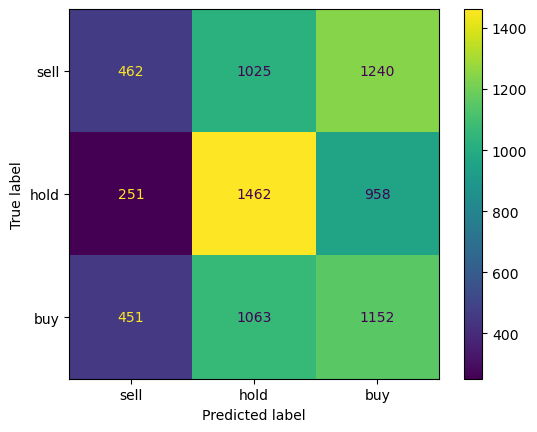

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [40]:
X_test.shape

(8064, 20)

In [43]:
## predict on indiv stocks

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    # if use selectKbest
    stock_X_test = selector.transform(stock_X_test)
    # if use PCA
    # stock_X_test = pca.transform(stock_X_test)

    stock_y_test = stock_df[target].to_numpy()

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

# choose top 10 from here

WDAY: 40.32
INTC: 40.65
MU: 37.92
CDNS: 33.6
TEAM: 42.06
AMAT: 36.99
MRVL: 41.63
III.L: 38.0
MKS.L: 33.44
RR.L: 40.0
TTD: 43.44
SMCI: 38.1
CPRT: 30.83
DDOG: 40.8
PANW: 35.86
MSFT: 39.04
INTU: 36.8
DASH: 31.17
PDD: 42.51
NVDA: 34.55
TSLA: 35.33
MRNA: 37.25
ADBE: 31.65
ABNB: 41.11
SNPS: 43.15
AMD: 36.02
ZS: 38.49
META: 38.65
AMZN: 38.49
AVGO: 33.02
LRCX: 41.04
CRWD: 39.36
MELI: 43.33
MDB: 34.39
BKNG: 47.83
